In [30]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [21]:
# Data from BitLT
bitLt_data = [
    # {"Ring size": 1, "Size": 32768, "Batch size": 1, "With Rand": 0.058, "Without Rand": 0.007, "Eval Time": 0.028667},
    # {"Ring size": 1, "Size": 32768, "Batch size": 10, "With Rand": 0.0530667, "Without Rand": 0.048667, "Eval Time": 0.0237333},
    # {"Ring size": 1, "Size": 32768, "Batch size": 100, "With Rand": 5.73033, "Without Rand": 0.452333, "Eval Time": 2.641},
    # {"Ring size": 1, "Size": 32768, "Batch size": 1000, "With Rand": 45.8927, "Without Rand": 5.216, "Eval Time": 19.6963},
    {"Ring size": 32, "Size": 1024, "Batch size": 1, "With Rand": 0.114667, "Without Rand": 0.013, "Eval Time": 2.23533},
    {"Ring size": 32, "Size": 1024, "Batch size": 10, "With Rand": 0.764333, "Without Rand": 0.074667, "Eval Time": 6.69233},
    {"Ring size": 32, "Size": 1024, "Batch size": 100, "With Rand": 7.51267, "Without Rand": 0.681333, "Eval Time": 79.6773},
    {"Ring size": 32, "Size": 1024, "Batch size": 1000, "With Rand": 40.541, "Without Rand": 8.46567, "Eval Time": 571.868},
]

# Data from private compare
pc_data = [
    {"Ring size": 32, "Size": 1024, "Batch size": 1, "Without Rand": 0.003, "Eval Time": 2.34533},
    {"Ring size": 32, "Size": 1024, "Batch size": 10, "Without Rand": 0.023667, "Eval Time": 10.8127},
    {"Ring size": 32, "Size": 1024, "Batch size": 100, "Without Rand": 2.004, "Eval Time": 100.561},
    {"Ring size": 32, "Size": 1024, "Batch size": 1000, "Without Rand": 13.048, "Eval Time": 1091.19},
]

# Data from DReLU
DReLU_data = [
    {"Ring size": 32, "Size": 1024, "Batch size": 1, "Eval Time": 2.253 },
    {"Ring size": 32, "Size": 1024, "Batch size": 10, "Eval Time": 10.5253 },
    {"Ring size": 32, "Size": 1024, "Batch size": 100, "Eval Time": 110.227},
    {"Ring size": 32, "Size": 1024, "Batch size": 1000, "Eval Time": 1477.15 },
]

# Data from MSB
MSB_data = [
    {"Ring size": 32, "Size": 1024, "Batch size": 1, "Eval Time": 1.17733},
    {"Ring size": 32, "Size": 1024, "Batch size": 10, "Eval Time": 7.45767},
    {"Ring size": 32, "Size": 1024, "Batch size": 100, "Eval Time": 97.4273},
    {"Ring size": 32, "Size": 1024, "Batch size": 1000, "Eval Time": 796.407},
]


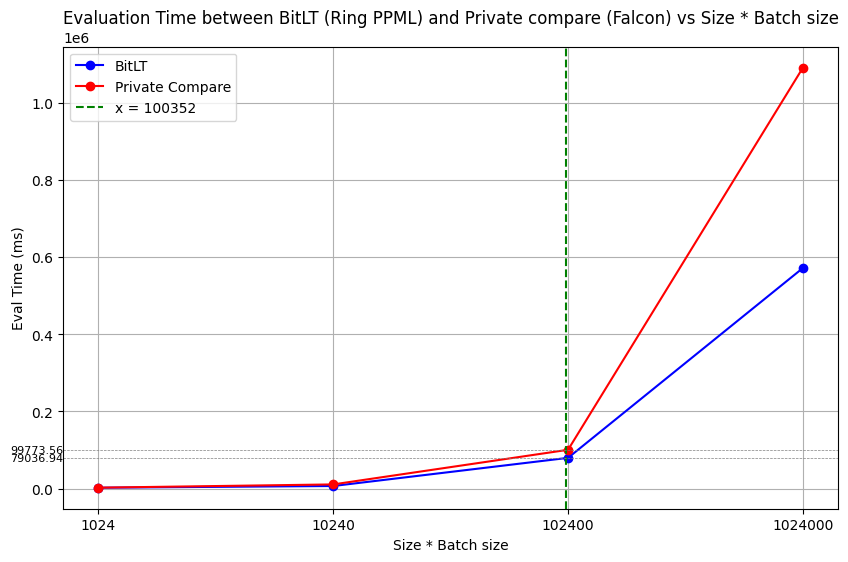

In [19]:
## Evaluation Time between BitLT (Ring PPML) and Private compare (Falcon) vs Size * Batch size
# Data extraction
bitLt_x = [entry["Size"] * entry["Batch size"] for entry in bitLt_data]
bitLt_y = [entry["Eval Time"] * 1000 for entry in bitLt_data]  # Convert to milliseconds

pc_x = [entry["Size"] * entry["Batch size"] for entry in pc_data]
pc_y = [entry["Eval Time"] * 1000 for entry in pc_data]  # Convert to milliseconds

# Calculate log2 of the x values
bitLt_x_log2 = [np.log2(x) for x in bitLt_x]
pc_x_log2 = [np.log2(x) for x in pc_x]

# Value for the vertical line
vertical_line_x = 28 * 28 * 128
vertical_line_log2 = np.log2(vertical_line_x)

# Function to interpolate the y-value at the vertical line
def interpolate_y(x_vals, y_vals, target_x):
    return np.interp(target_x, x_vals, y_vals)

# Calculate the intersection points
bitLt_y_intersection = interpolate_y(bitLt_x_log2, bitLt_y, vertical_line_log2)
pc_y_intersection = interpolate_y(pc_x_log2, pc_y, vertical_line_log2)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(bitLt_x_log2, bitLt_y, marker='o', linestyle='-', color='b', label='BitLT')
plt.plot(pc_x_log2, pc_y, marker='o', linestyle='-', color='r', label='Private Compare')

# Add vertical line
plt.axvline(vertical_line_log2, color='g', linestyle='--', label=f'x = {vertical_line_x}')

# Add horizontal lines at the intersection points
plt.axhline(bitLt_y_intersection, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(pc_y_intersection, color='gray', linestyle='--', linewidth=0.5)

# Annotate the intersection points on the left side
plt.text(plt.xlim()[0], bitLt_y_intersection, f'{bitLt_y_intersection:.2f}', color='black', fontsize=8, verticalalignment='center', horizontalalignment='right')
plt.text(plt.xlim()[0], pc_y_intersection, f'{pc_y_intersection:.2f}', color='black', fontsize=8, verticalalignment='center', horizontalalignment='right')

plt.xlabel('Size * Batch size')
plt.ylabel('Eval Time (ms)')
plt.title('Evaluation Time between BitLT (Ring PPML) and Private compare (Falcon) vs Size * Batch size')
plt.legend()
plt.grid(True)

# Set the x-ticks to the specific log2 values
all_x_log2 = sorted(set(bitLt_x_log2 + pc_x_log2))
plt.xticks(all_x_log2, [f"{2**x:.0f}" for x in all_x_log2])

plt.show()


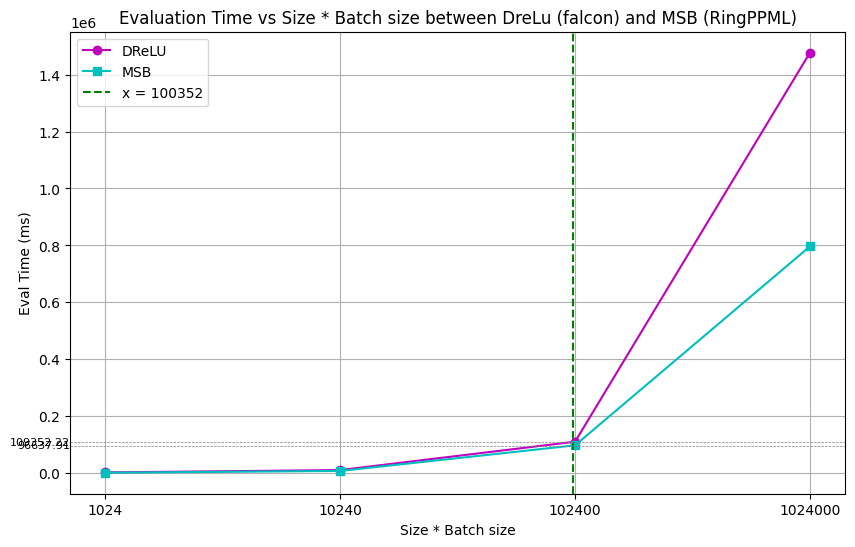

In [24]:

# Extract x and y values and calculate log2
def extract_values(data):
    x = [entry["Size"] * entry["Batch size"] for entry in data]
    y = [entry["Eval Time"] * 1000 for entry in data]  # Convert to milliseconds
    x_log2 = [np.log2(x_val) for x_val in x]
    return x, y, x_log2

DReLU_x, DReLU_y, DReLU_x_log2 = extract_values(DReLU_data)
MSB_x, MSB_y, MSB_x_log2 = extract_values(MSB_data)

# Value for the vertical line
vertical_line_x = 28 * 28 * 128
vertical_line_log2 = np.log2(vertical_line_x)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(DReLU_x_log2, DReLU_y, marker='o', linestyle='-', color='m', label='DReLU')
plt.plot(MSB_x_log2, MSB_y, marker='s', linestyle='-', color='c', label='MSB')

# Add vertical line
plt.axvline(vertical_line_log2, color='g', linestyle='--', label=f'x = {vertical_line_x}')

# Add horizontal lines at the intersection points
def interpolate_y(x_vals, y_vals, target_x):
    return np.interp(target_x, x_vals, y_vals)

DReLU_y_intersection = interpolate_y(DReLU_x_log2, DReLU_y, vertical_line_log2)
MSB_y_intersection = interpolate_y(MSB_x_log2, MSB_y, vertical_line_log2)

plt.axhline(DReLU_y_intersection, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(MSB_y_intersection, color='gray', linestyle='--', linewidth=0.5)

# Annotate the intersection points on the left side
plt.text(plt.xlim()[0], DReLU_y_intersection, f'{DReLU_y_intersection:.2f}', color='black', fontsize=8, verticalalignment='center', horizontalalignment='right')
plt.text(plt.xlim()[0], MSB_y_intersection, f'{MSB_y_intersection:.2f}', color='black', fontsize=8, verticalalignment='center', horizontalalignment='right')

plt.xlabel('Size * Batch size')
plt.ylabel('Eval Time (ms)')
plt.title('Evaluation Time vs Size * Batch size between DreLu (falcon) and MSB (RingPPML)')
plt.legend()
plt.grid(True)

# Set the x-ticks to the specific log2 values
all_x_log2 = sorted(set(DReLU_x_log2 + MSB_x_log2))
plt.xticks(all_x_log2, [f"{2**x:.0f}" for x in all_x_log2])

plt.show()

In [89]:
def float_to_fixedpoint(a, Float_precision=FLOAT_PRECISION):
    return int(a * (1 << Float_precision))

def fixedpoint_to_float(value, Float_precision=FLOAT_PRECISION):
    return value / (1 << Float_precision)

def getShare_int(ls, _randrange=ring):
    size = len(ls)
    np.random.seed(42)
    share0 = np.random.randint(_randrange, size=size).tolist()
    np.random.seed(43)
    share1 = np.random.randint(_randrange, size=size).tolist()
    share2 = [(ls[i] - share0[i] - share1[i]) & ((1 << ring_size) - 1) for i in range(size)]
    return [share0, share1, share2]

def open(share):
    size = len(share[0])
    return [(share[0][i] + share[1][i] + share[2][i]) & ((1 << ring_size) - 1) for i in range(size)]

def getShare_float(ls, Float_precision=FLOAT_PRECISION):
    ls_fixed = [float_to_fixedpoint(x, Float_precision) for x in ls]
    print("float to fixed point: ", ls_fixed)
    size = len(ls_fixed)
    np.random.seed(42)
    share0 = [float_to_fixedpoint(np.random.rand(), Float_precision) for _ in range(size)]
    np.random.seed(43)
    share1 = [float_to_fixedpoint(np.random.rand(), Float_precision) for _ in range(size)]
    share2 = [(ls_fixed[i] - share0[i] - share1[i]) & ((1 << ring_size) - 1) for i in range(size)]
    return [share0, share1, share2]

def open_float(share, Float_precision=FLOAT_PRECISION):
    size = len(share[0])
    result_fixed = [(share[0][i] + share[1][i] + share[2][i]) & ((1 << ring_size) - 1) for i in range(size)]
    print("fixed input opened: ", result_fixed)
    return [fixedpoint_to_float(x, Float_precision) for x in result_fixed]

def list_delta(list_val_a:list, list_val_b:list):

    sz = len(list_val_a)
    if(sz != len(list_val_b)):
        return False
    
    return [abs(list_val_a[i] - list_val_b[i]) for i in range(sz)]

def delta(list_val_a:list, list_val_b:list):
    _list_delta = list_delta(list_val_a, list_val_b)
    sz = len(_list_delta)
    sum = 0
    for item in _list_delta:
        sum += item
    return sum/sz

def ss_mult(ss_list_a:list[list], ss_list_b:list[list], size=32):

    # define mult calculate by each party
    mult0 = []
    mult1 = []
    mult2 = []
    # mult = []

    sz = len(ss_list_a[0])
    if sz != len(ss_list_b[0]): 
        return (False)
    for i in range(sz):
        mult0.append((ss_list_a[0][i]* ss_list_b[0][i] \
                    + ss_list_a[0][i]* ss_list_b[1][i] \
                    + ss_list_a[0][i] * ss_list_b[2][i]) & (size-1))
        
        mult1.append((ss_list_a[1][i]* ss_list_b[0][i] \
                    + ss_list_a[1][i]* ss_list_b[1][i] \
                    + ss_list_a[1][i] * ss_list_b[2][i]) & (size-1))
        
        mult2.append((ss_list_a[2][i]* ss_list_b[0][i] \
                    + ss_list_a[2][i]* ss_list_b[1][i] \
                    + ss_list_a[2][i] * ss_list_b[2][i]) & (size-1))

        # mult.append(mult0[i] + mult1[i] + mult2[i])

    return [mult0, mult1, mult2]
    # return (True, mult)


## Mô phỏng quá trình nhân với kỹ thuật Secret Sharing với kiểu dữ liệu int, và float

In [65]:
## Multiplication visualization with int value

# ring setting
ring_size = 8
ring = 1 << ring_size
# Setting integer input
RANDOM_BITS = 5
RAN_RANGE = 2**RANDOM_BITS
input_size = 5

# Generate a list of random integers
random_list = [random.randrange(RAN_RANGE) for _ in range(input_size)]

print(random_list)
ss_random_list = getShare_int(random_list)
print(ss_random_list)
open_random_list = open(ss_random_list)
print(open_random_list)

ss_mult_list = ss_mult(ss_random_list, ss_random_list, ring)
print(ss_mult_list)
print(open(ss_mult_list))
#


[8, 7, 6, 6, 23]
[[102, 179, 92, 14, 106], [68, 64, 255, 49, 21], [94, 20, 171, 199, 152]]
[8, 7, 6, 6, 23]
[[304, 997, 552, 596, 902], [544, 448, 1018, 550, 739], [240, 140, 514, 938, 424]]
[64, 49, 36, 36, 17]



| Input | party 0 | party 1 | party 2 |
|:-------:|:-------:|:-------:| :-------:|
| 8<br>7<br>6<br>6<br>23 | 102<br>179<br>92<br>14<br>106 | 68<br>64<br>255<br>49<br>21 | 94<br>20<br>171<br>199<br>152 |

*Cơ chế phép nhân*

```
c = a x b 
  = (a0 + a1 + a2) x (b0 + b1 + b2)
  = a0 x ((b0 + b1 + b2)) + a1 x ((b0 + b1 + b2)) + a2 x ((b0 + b1 + b2))
  = mult0 + mult1 + mult2
```

*Xét ví dụ bên trên*

- Lấy chính vector khởi tạo nhân với nó ta được vector mới có giá trị ouput cuối cùng ko đúng với dự kiến: `23*23 = 529 >< 17`.
- Nguyên nhân sai lệch là do vành 8 bits nên giá trị thu được là `529` sẽ bị chuyển về  `17`: `17 = 529 % (2**8)`
- Khi đó ta cần tính toán trong việc chuyển một số qua tính toán trên fixed point và xác định được số lượng fixed point tối đa


In [92]:
## Multiplication visualization with fixedpoint value

# ring setting
ring_size = 32
ring = 1 << ring_size
# Setting integer input
RANDOM_BITS = 8
RAN_RANGE = 2**RANDOM_BITS
FLOAT_PRECISION_MAX = (ring_size>>1)- RANDOM_BITS
FLOAT_PRECISION = FLOAT_PRECISION_MAX

input_size = 5

# Generate a list of random floating-point numbers
random_floats = [random.uniform(0, RAN_RANGE) for _ in range(input_size)]

print(random_floats)

## Get float share
ss_random_list_float = getShare_float(random_floats, Float_precision=FLOAT_PRECISION)
print(ss_random_list_float)

## check float share
open_random_list_float = open_float(ss_random_list_float, Float_precision=FLOAT_PRECISION)
print(open_random_list_float)

# ## get delta between floating and fixed
# list_delta_float = list_delta(random_floats, open_random_list_float)
# print(list_delta_float)
# print(delta(random_floats, open_random_list_float))

## mult
print("--------------------------")
ss_mult_list_float = ss_mult(ss_random_list_float, ss_random_list_float, ring)
print("mult list fixed float: ", ss_mult_list_float)
print ("open ", open(ss_mult_list_float))
print(open_float(ss_mult_list_float, FLOAT_PRECISION<<1))
print(open_random_list_float[0]**2)



[255.7661313696008, 190.88843954566104, 135.14617148837283, 253.27622063027235, 82.1768290184628]
float to fixed point:  [65476, 48867, 34597, 64838, 21037]
[[95, 243, 187, 153, 39], [29, 155, 34, 61, 83], [65352, 48469, 34376, 64624, 20915]]
fixed input opened:  [65476, 48867, 34597, 64838, 21037]
[255.765625, 190.88671875, 135.14453125, 253.2734375, 82.17578125]
--------------------------
mult list fixed float:  [[6220220, 11874681, 6469639, 9920214, 820443], [1898804, 7574385, 1176298, 3955118, 1746071], [4278987552, 2368534623, 1189306472, 4190090912, 439988855]]
open  [4287106576, 2387983689, 1196952409, 4203966244, 442555369]
fixed input opened:  [4287106576, 2387983689, 1196952409, 4203966244, 442555369]
[65416.054931640625, 36437.7393951416, 18264.044326782227, 64147.434143066406, 6752.859024047852]
65416.054931640625
